In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import ale_py
import torch
import matplotlib.pyplot as plt
from dqn_implementations import *

gym.register_envs(ale_py)

from IPython import display

In [3]:
env = gym.make("ALE/Pong-v5", obs_type="ram", 
               frameskip=8) # frameskip to make the model steps to go through faster

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
# Define training parameters
num_episodes = 2000
max_steps_per_episode = 2000
epsilon_start = 1.0
epsilon_end = 0.2
epsilon_decay_rate = 0.99
gamma = 0.9
tau = 1e-4
lr = 1e-4
buffer_size = 5000
buffer = deque(maxlen=buffer_size)
batch_size = 128
update_frequency = 50


# Initialize the DQNAgent
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n
new_agent = DQNAgent(input_dim, output_dim, batch_size, lr, buffer_size, device)

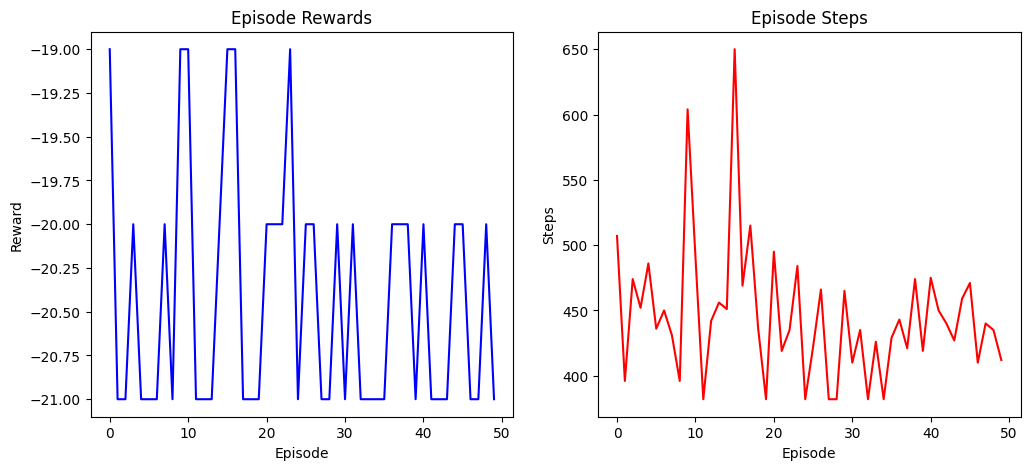

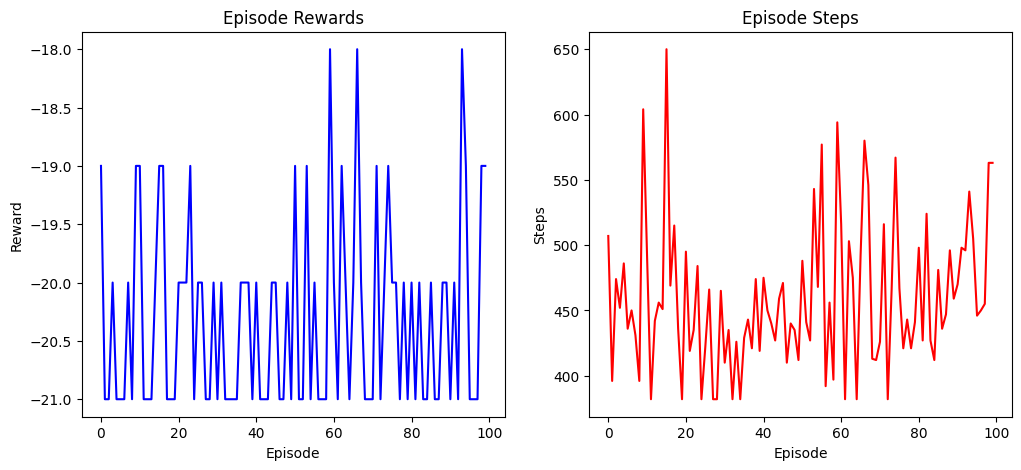

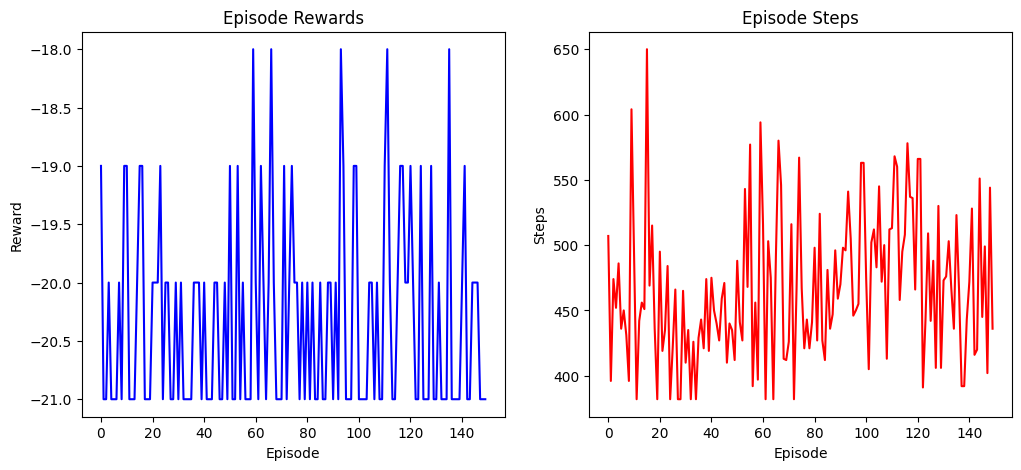

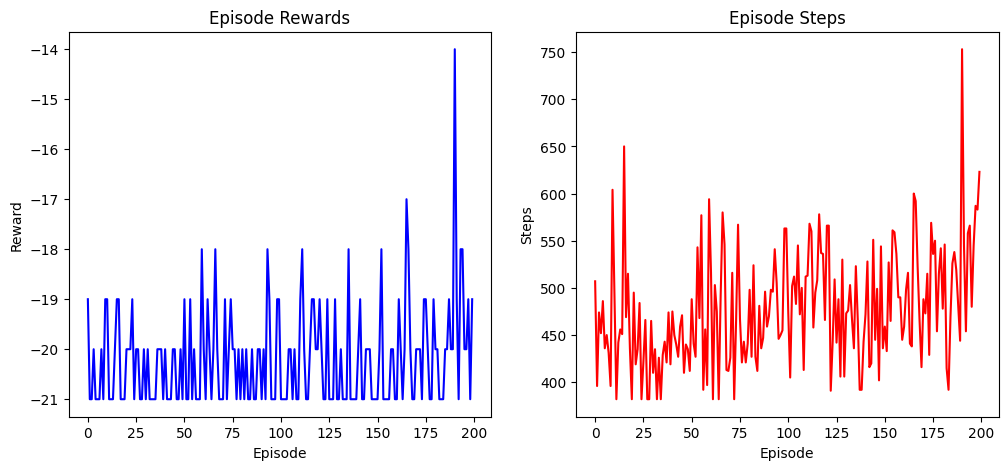

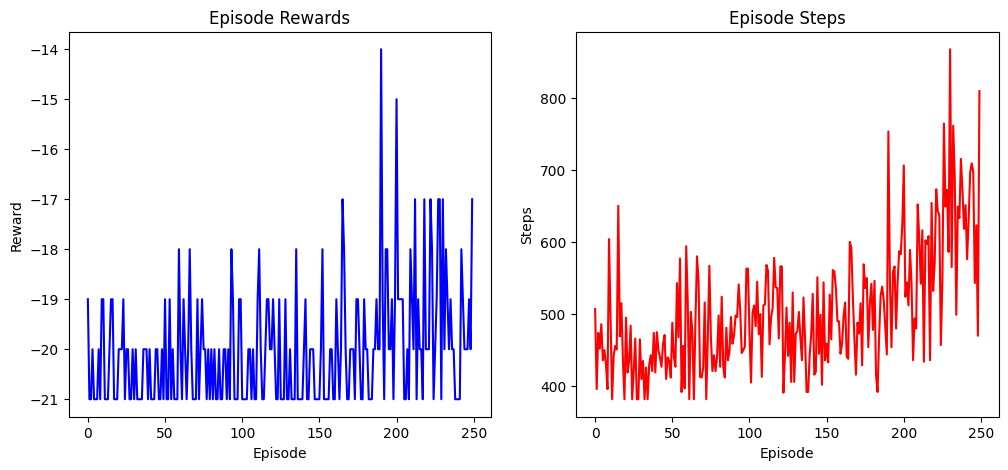

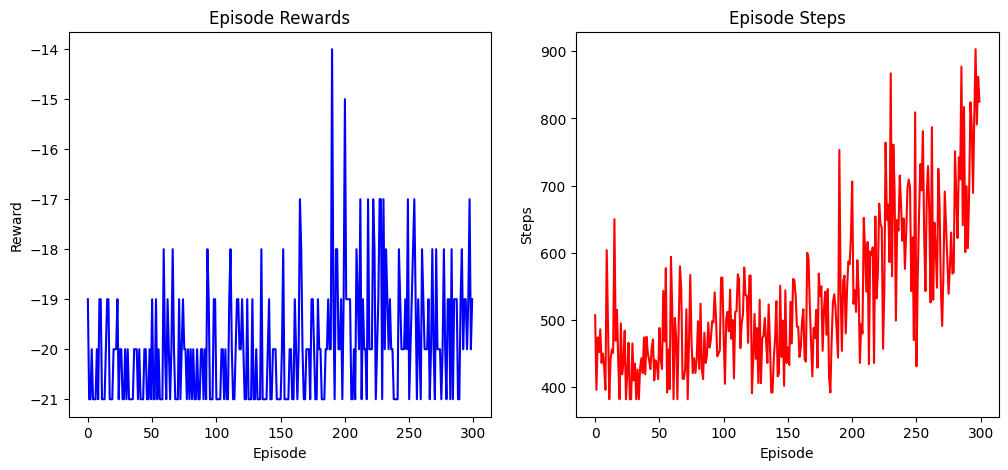

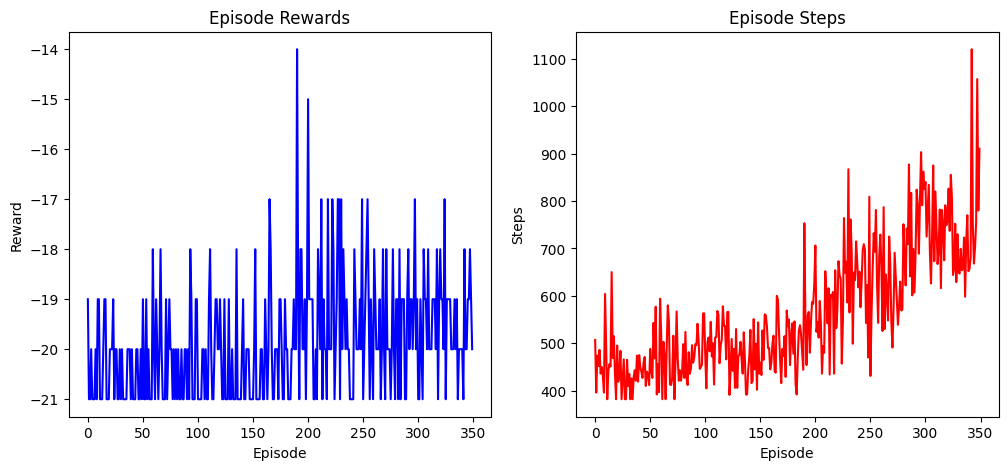

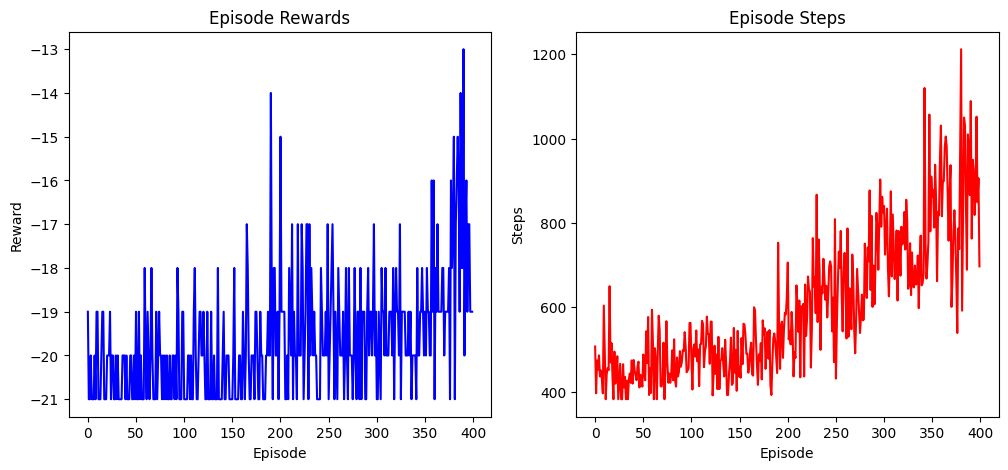

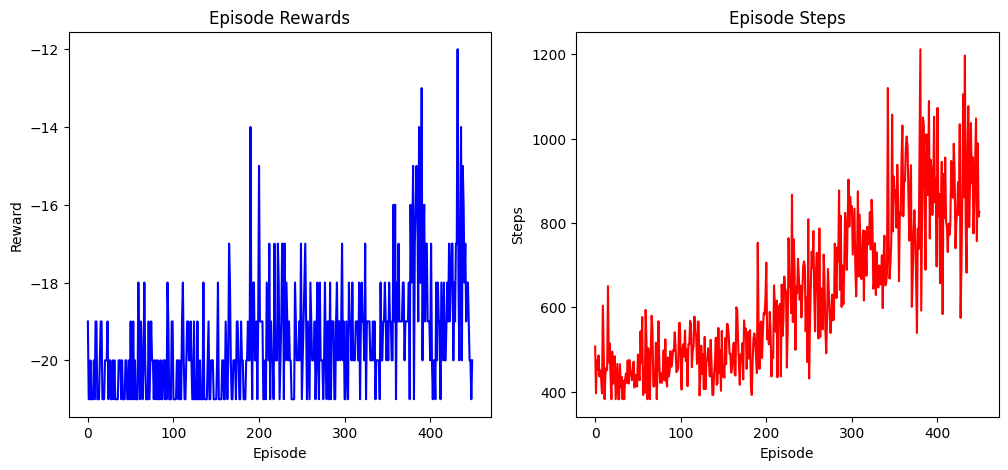

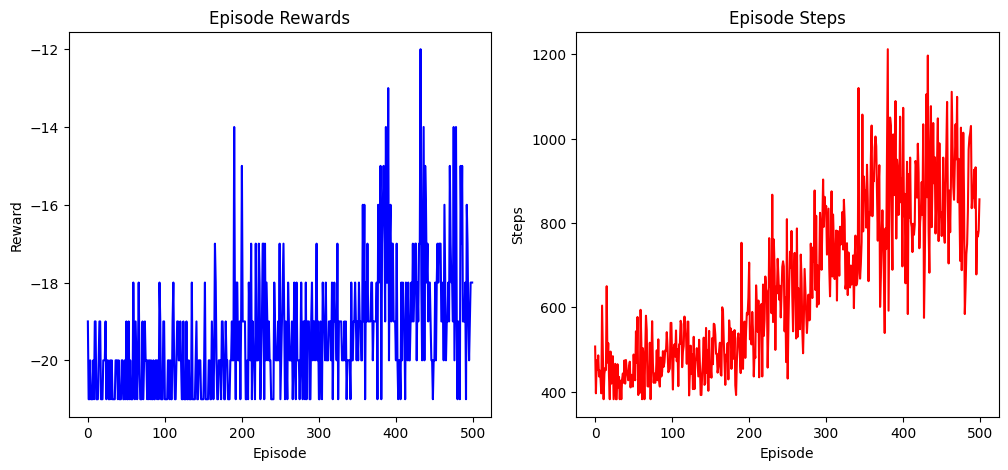

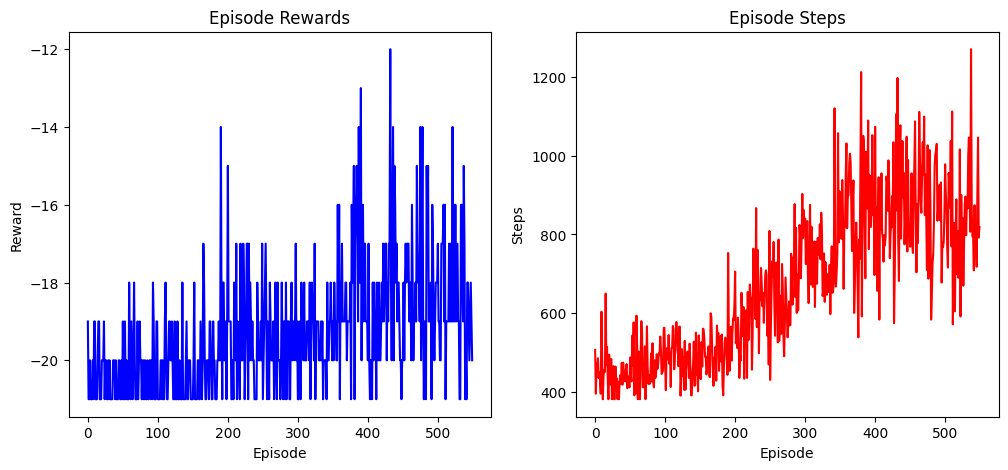

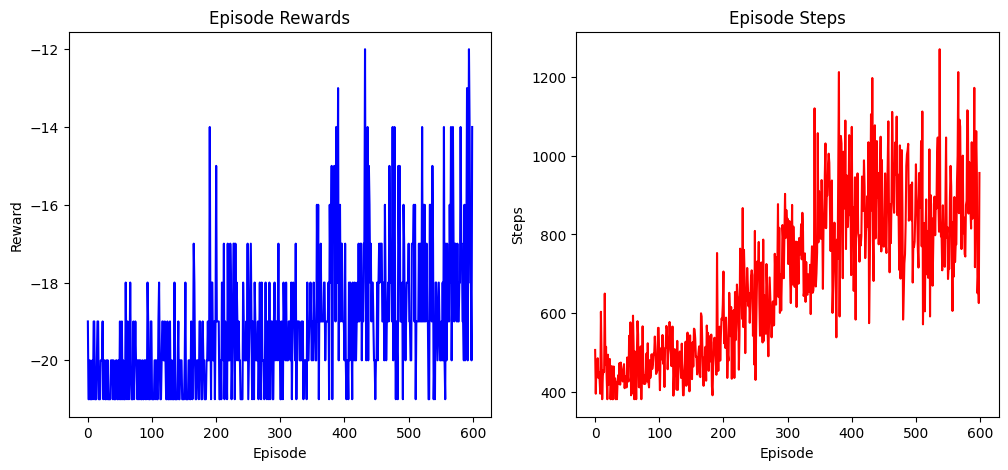

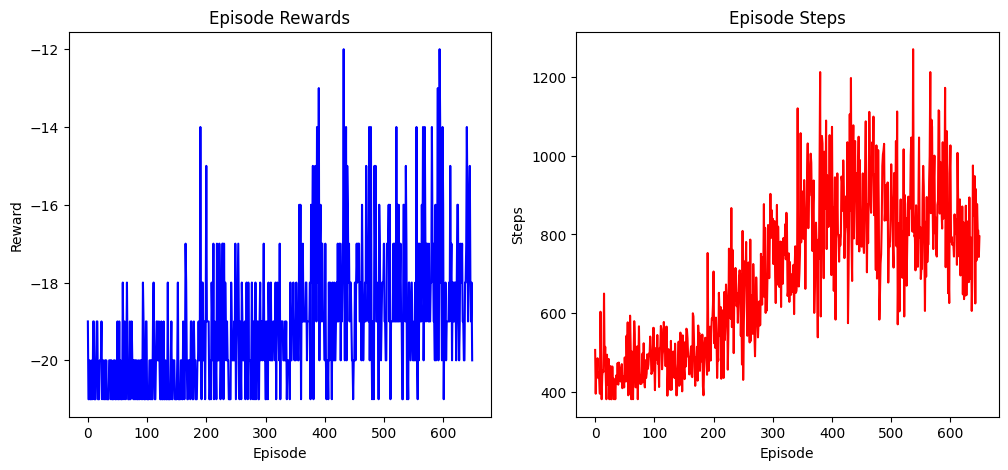

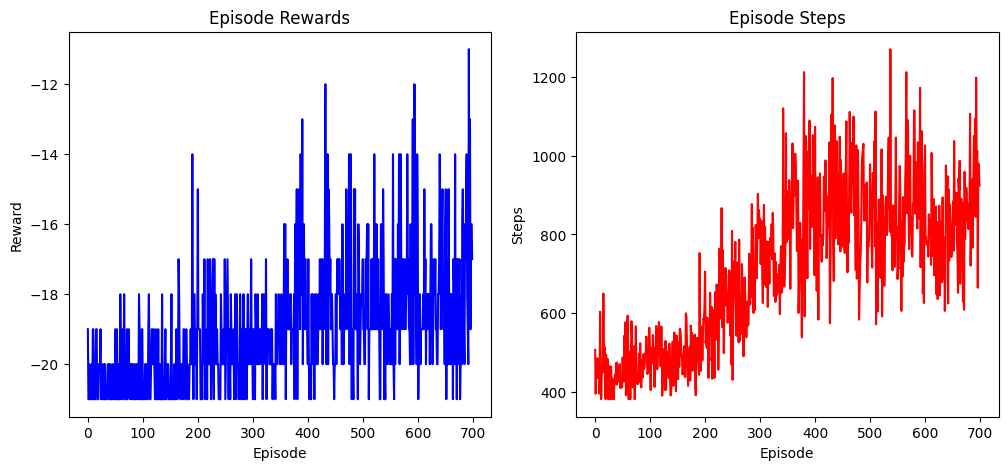

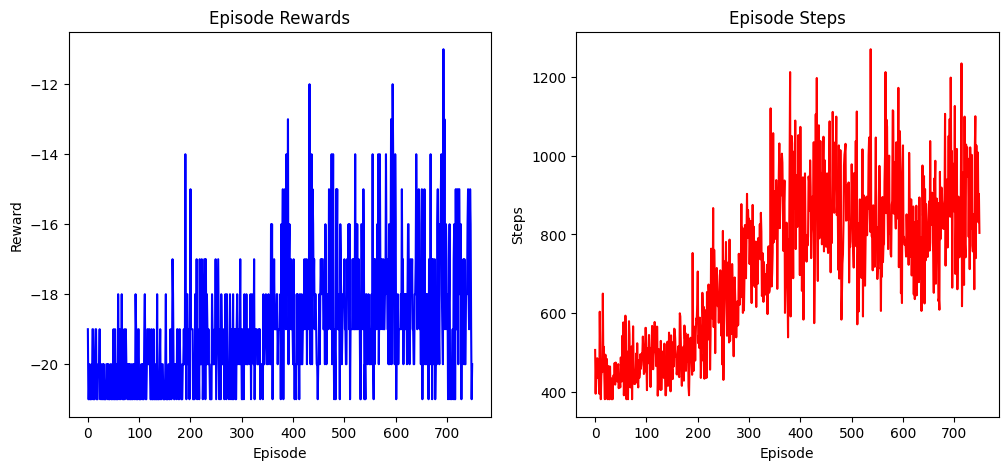

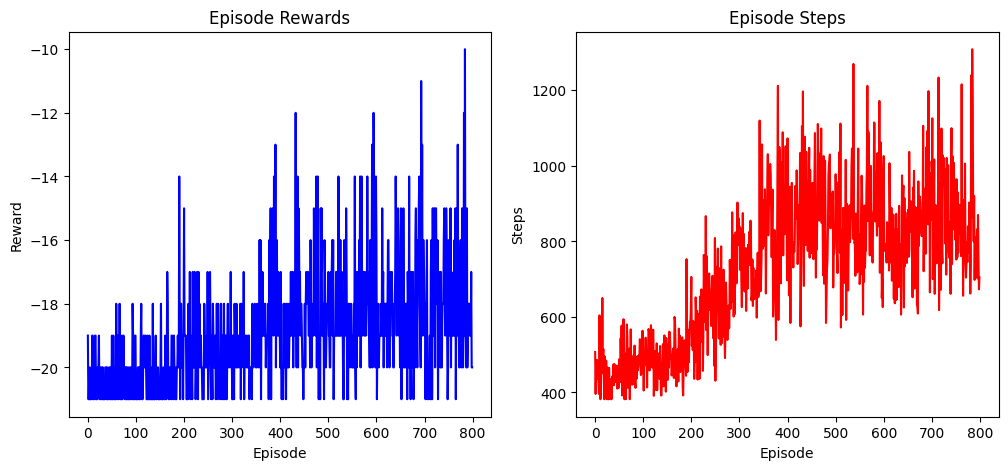

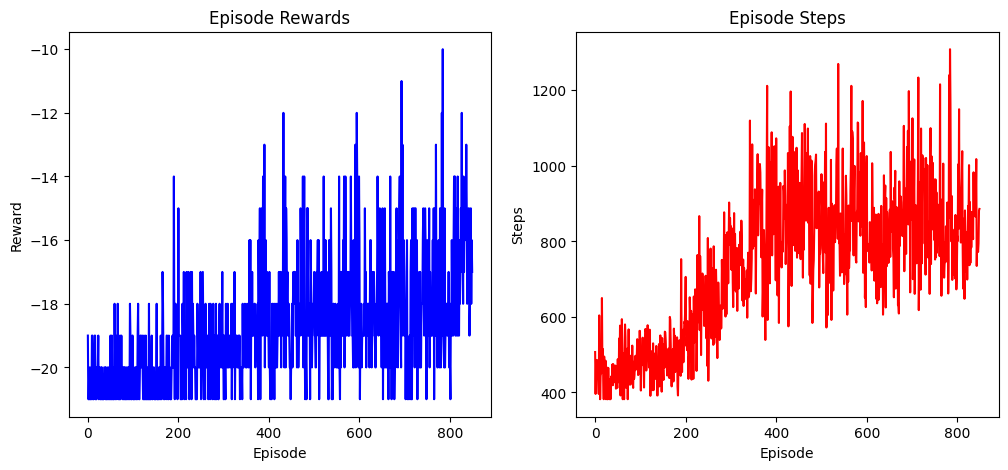

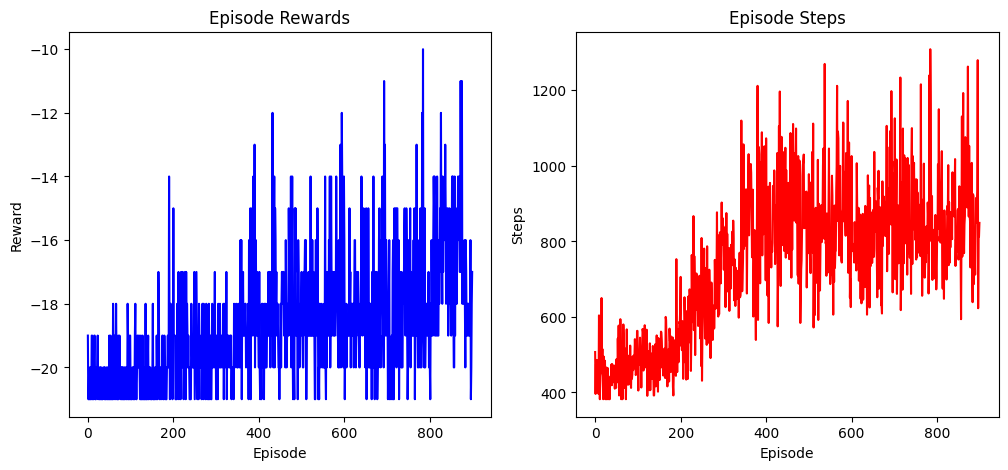

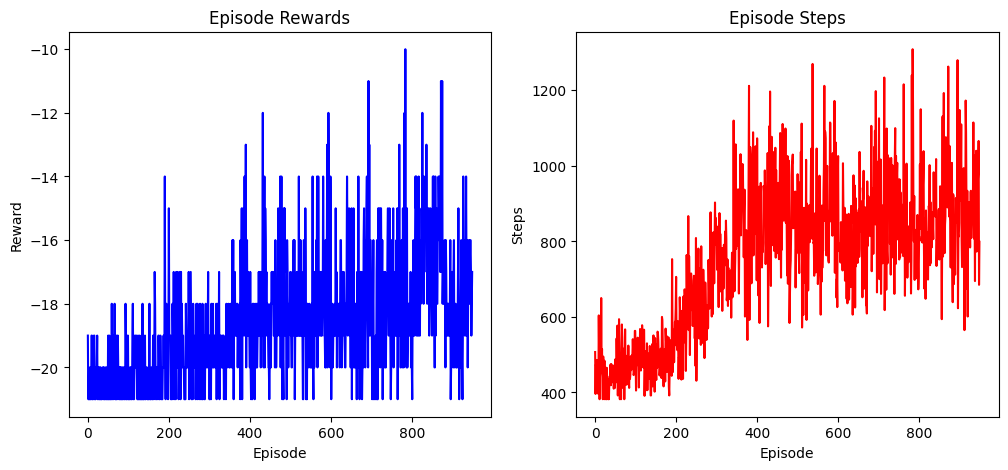

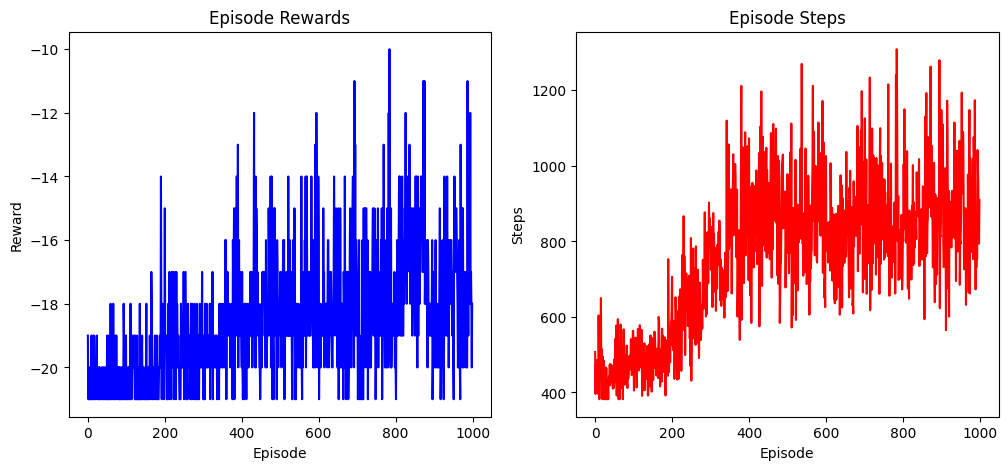

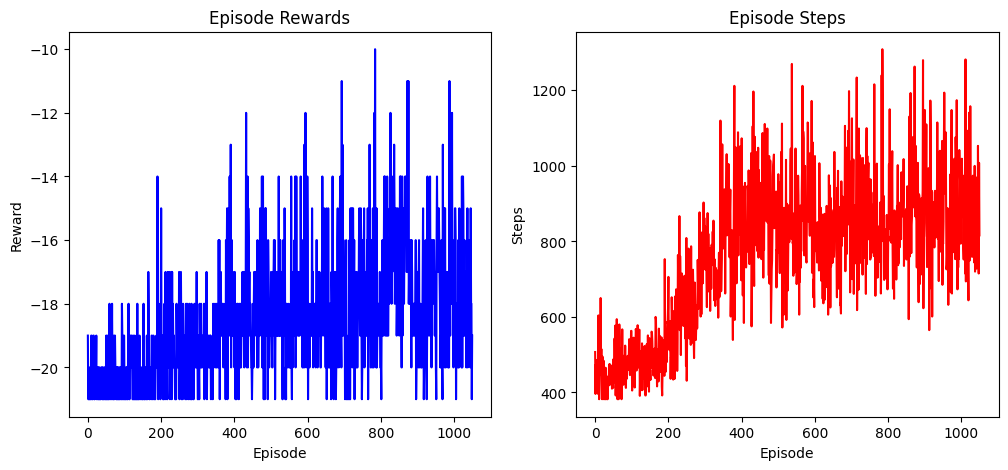

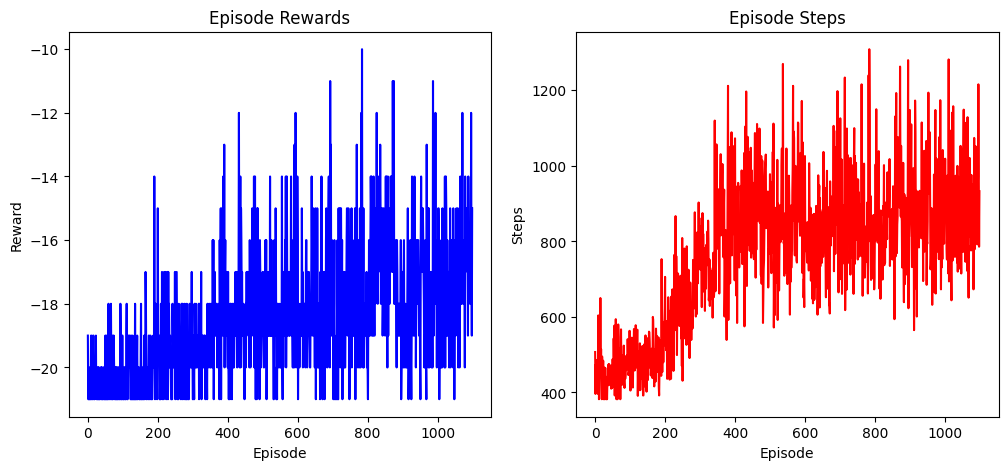

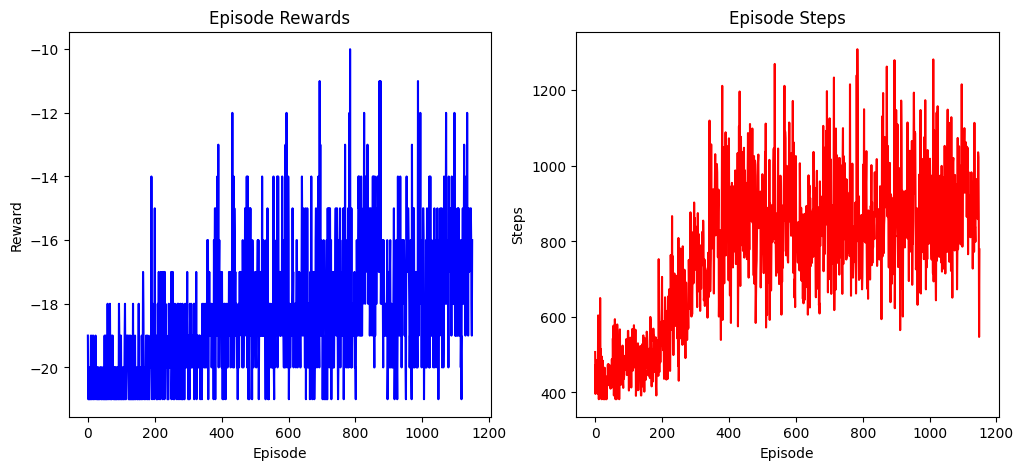

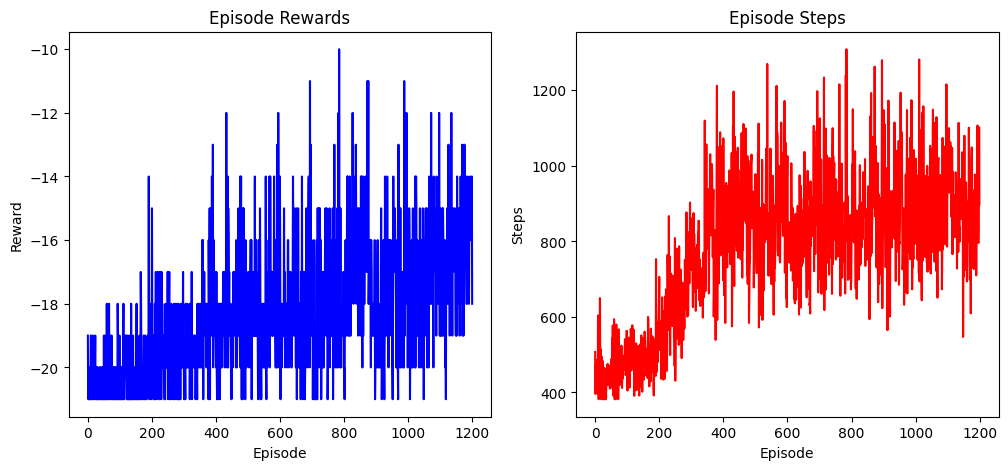

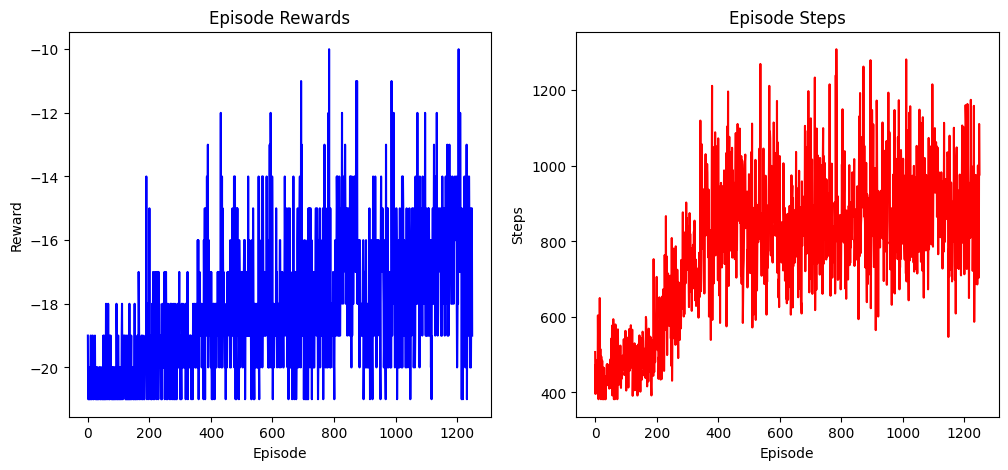

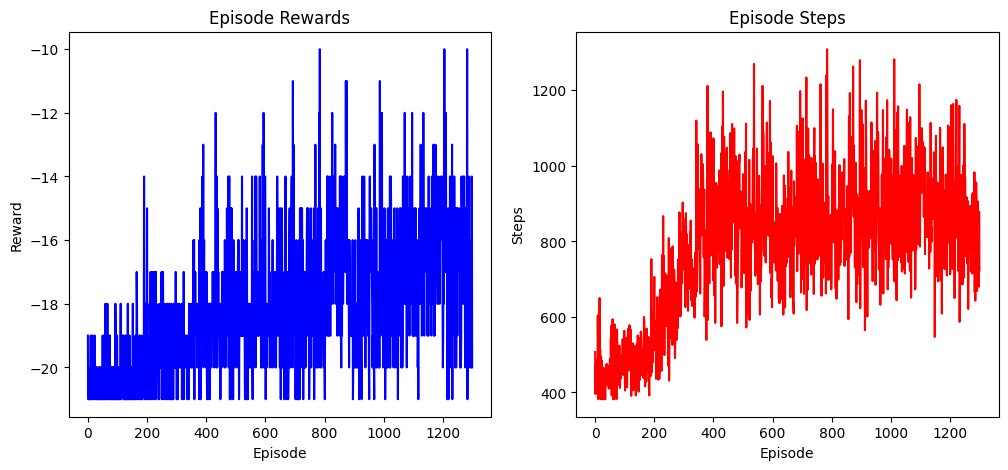

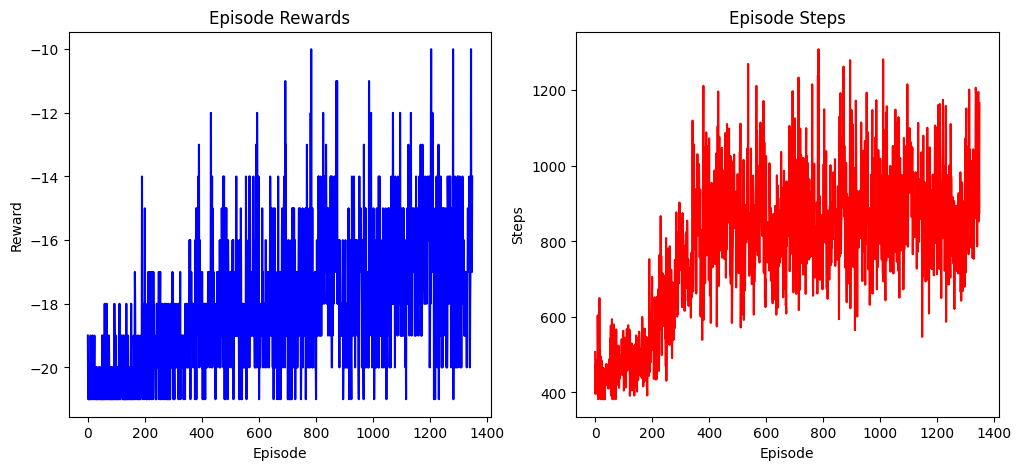

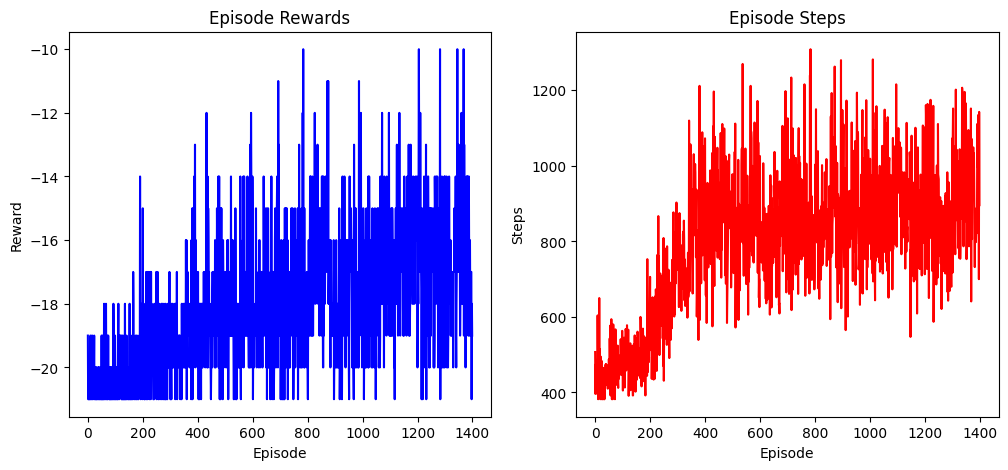

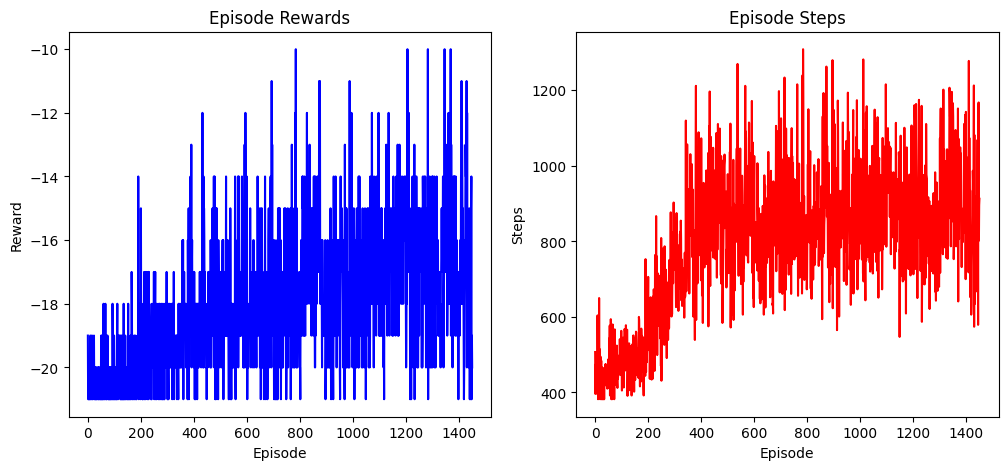

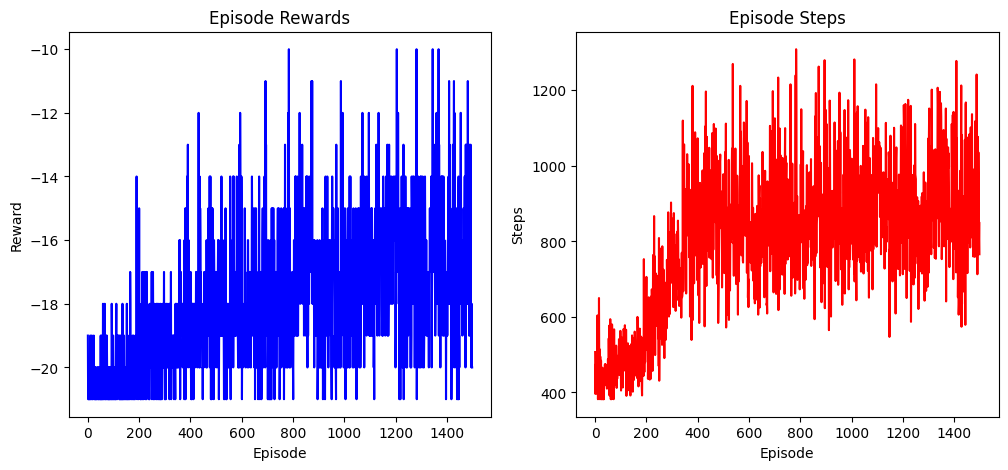

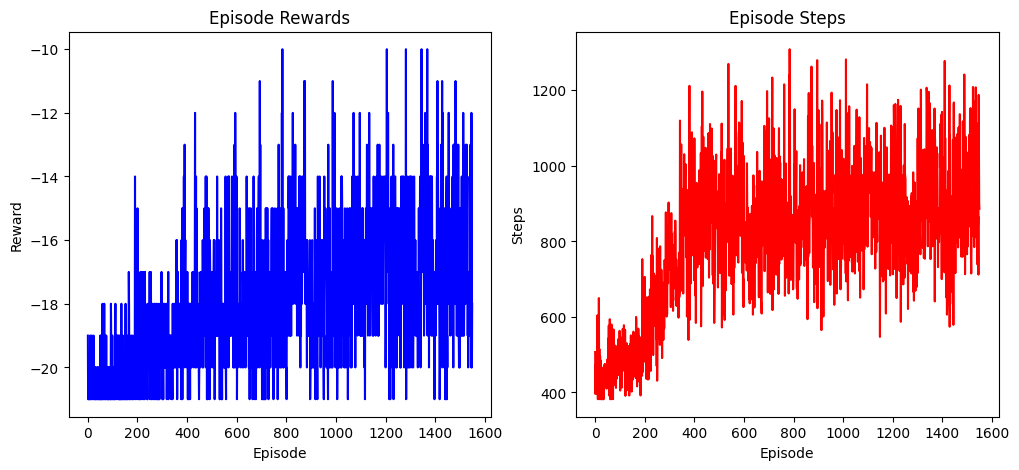

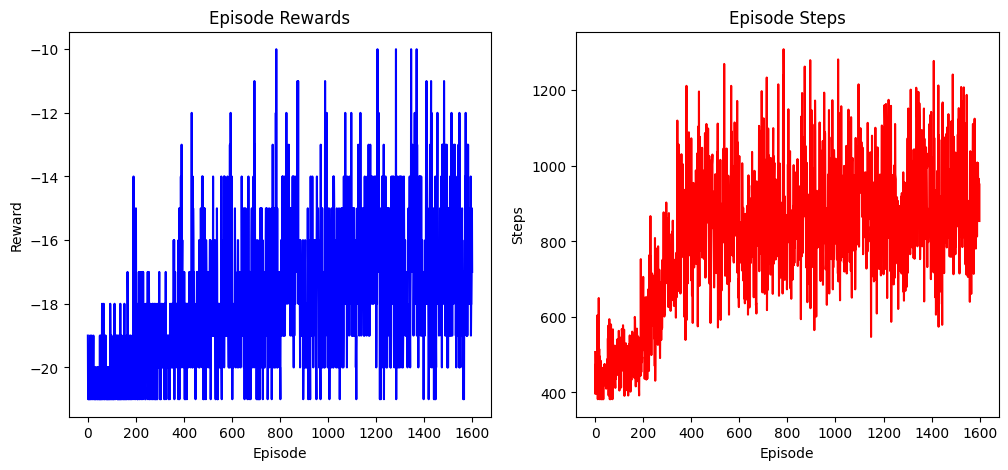

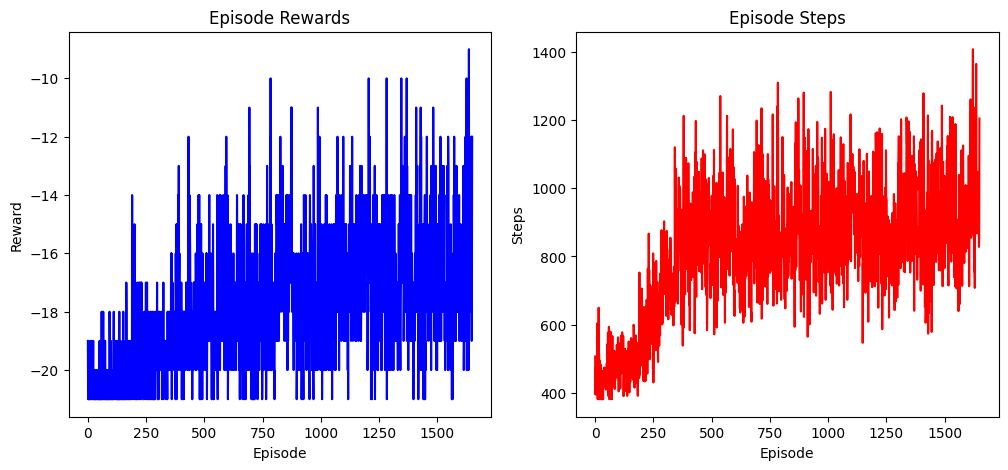

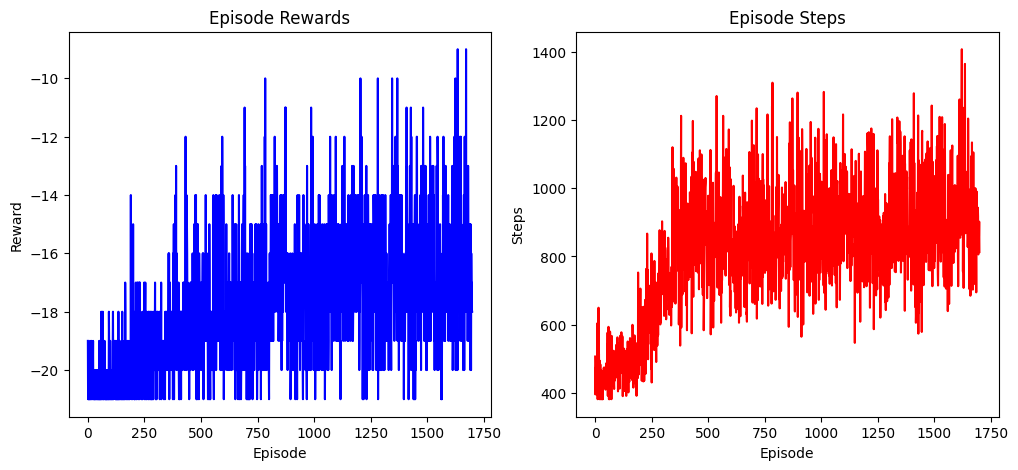

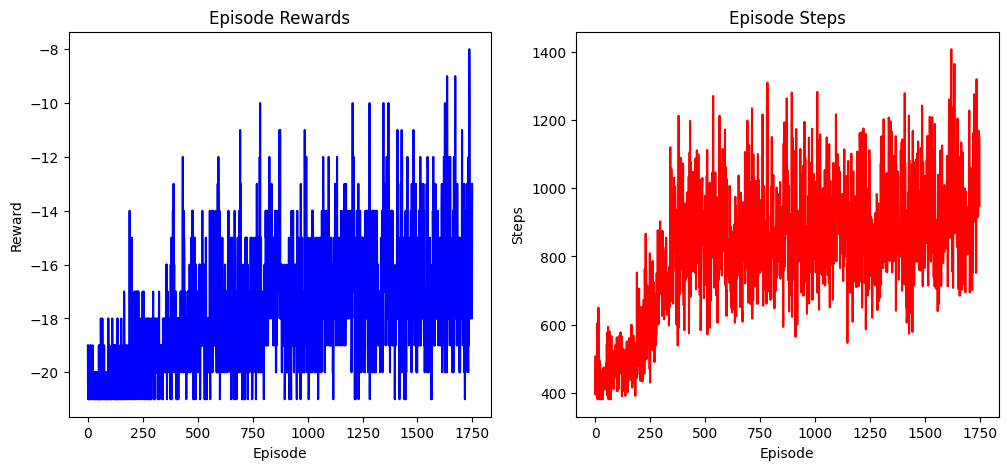

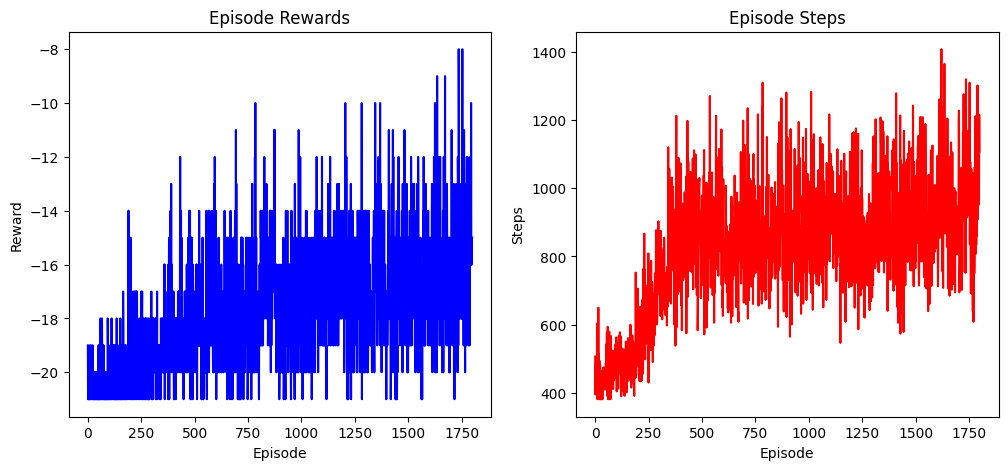

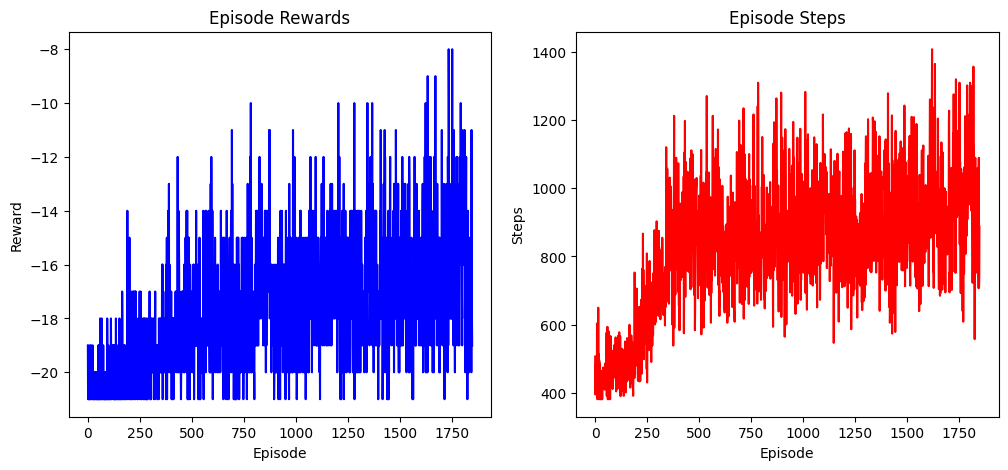

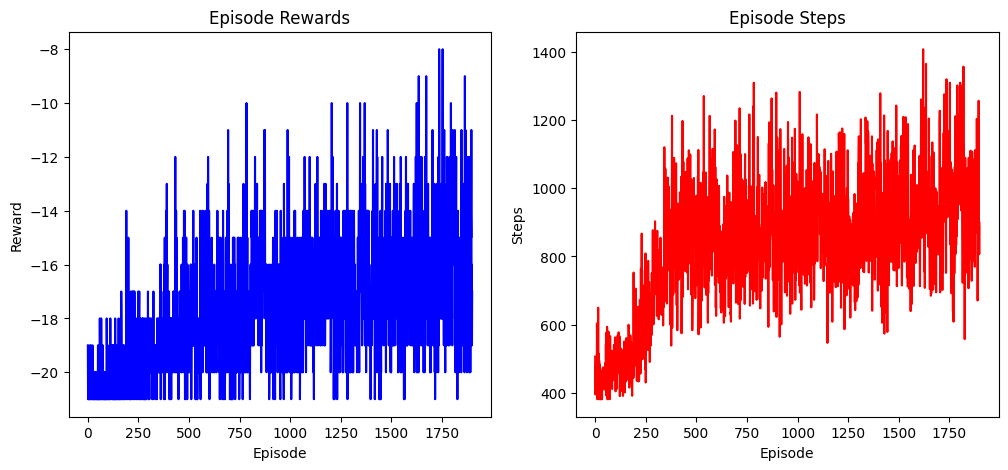

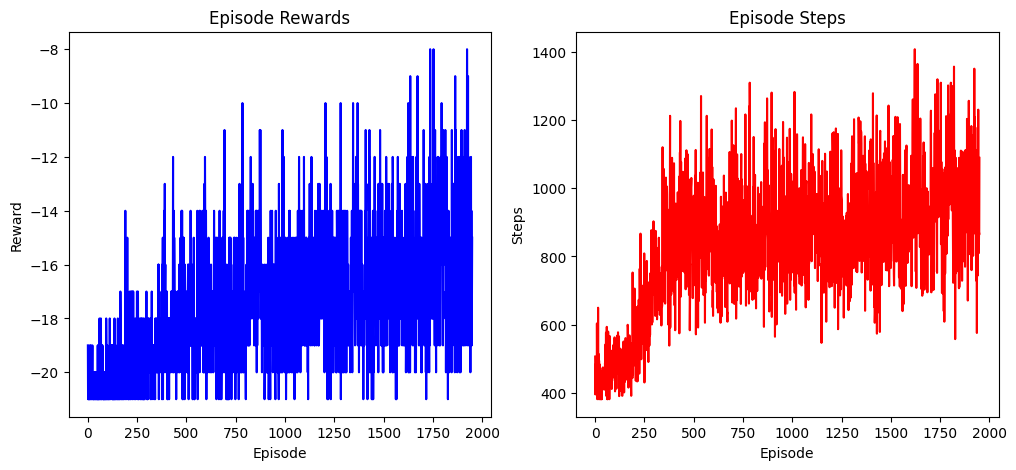

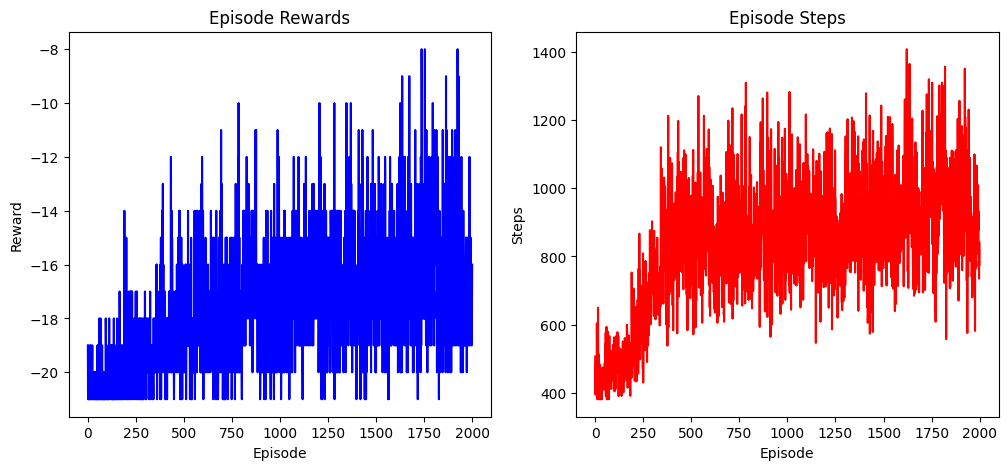

In [5]:
# Training loop

# Initialize lists to store episode rewards and steps
episode_rewards = []
episode_steps = []

for episode in range(num_episodes):
    # Reset the environment
    state, info = env.reset()
    epsilon = max(epsilon_end, epsilon_start * (epsilon_decay_rate ** episode))
    total_reward = 0

    # Run one episode
    for step in range(max_steps_per_episode):
        # Choose and perform an action
        action = new_agent.act(state, epsilon)
        next_state, reward, done, truncated, _ = env.step(action)
        
        total_reward += reward
        done = done or truncated

        buffer.append((state, action, reward, next_state, done))

        if len(buffer) >= batch_size:
            # Sample random action set from replay buffer
            batch = random.sample(buffer, batch_size)
    
            # Update the agent's knowledge
            new_agent.learn(batch, gamma, tau)

        state = next_state

        # Check if the episode has ended
        if done:
            break

    # Store the total reward and steps for the episode
    episode_rewards.append(total_reward)
    episode_steps.append(step + 1)

    if (episode + 1) % update_frequency == 0:
        print(f"Episode {episode + 1}: Finished training")
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        ax1, ax2 = axes
        # Set titles and labels for the subplots (only needed once if not clearing)
        ax1.set_title("Episode Rewards")
        ax1.set_xlabel("Episode")
        ax1.set_ylabel("Reward")

        ax2.set_title("Episode Steps")
        ax2.set_xlabel("Episode")
        ax2.set_ylabel("Steps")

        ax1.plot(episode_rewards, 'b-') # Plot updated reward data
        ax2.plot(episode_steps, 'r-')  # Plot updated step data

        display.display(plt.gcf())
        display.clear_output(wait=True)

In [6]:
torch.save(new_agent.qnetwork_local, 'q_network.ckpt')